In [1]:
import pandas as pd
dataset=pd.read_csv("/Users/STUDENT.LAB6_PC05/Desktop/salary_data.csv")

In [2]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
print(dataset.info()) #gives info abt dataframe
print(dataset.head())#first three tuples
print(dataset.columns.values)#columns in the csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
['YearsExperience' 'Salary']


In [4]:
import matplotlib.pyplot as plt
dataset.plot(y='YearsExperience',x='Salary',style='o')
plt.title('Years vs Salary')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
y=dataset['Salary'].values.reshape(-1,1) #flatening
x=dataset['YearsExperience'].values.reshape(-1,1)

# ML (Simple Linear Regression)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10) #if not specified 80%-20% train-test split
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(regressor.intercept_) #c
print(regressor.coef_) #m
print(regressor.coef_*8.5+regressor.intercept_)

[26490.60589054]
[[9371.74034704]]
[[106150.39884037]]


[[ 90218.4402504 ]
 [ 56480.17500106]
 [ 53668.65289695]
 [ 40548.2164111 ]
 [ 45234.08658461]
 [ 93029.96235452]
 [ 64914.7413134 ]
 [116459.31322211]]


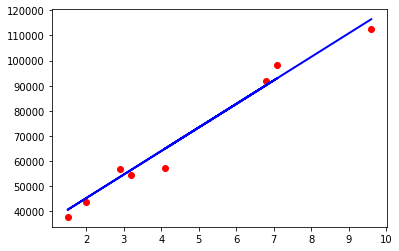

In [9]:
y_pred=regressor.predict(x_test)
print(y_pred)
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue',linewidth=2)
plt.show()

In [10]:
print(regressor.predict([[8.5]]))

[[106150.39884037]]


# Multiple Linear Regression

In [11]:
datas=pd.read_csv("/Users/STUDENT.LAB6_PC05/Desktop/REV.csv")
datas

,No,DATE,age,MRT,Stores,LAT,LONG,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [12]:
print(datas.info()) #gives info abt dataframe
print(datas.head())#first three tuples
print(datas.columns.values)#columns in the csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No        414 non-null int64
DATE      414 non-null float64
age       414 non-null float64
MRT       414 non-null float64
Stores    414 non-null int64
LAT       414 non-null float64
LONG      414 non-null float64
Price     414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None
   No      DATE   age       MRT   Stores       LAT       LONG  Price
0   1  2012.917  32.0   84.87882      10  24.98298  121.54024   37.9
1   2  2012.917  19.5  306.59470       9  24.98034  121.53951   42.2
2   3  2013.583  13.3  561.98450       5  24.98746  121.54391   47.3
3   4  2013.500  13.3  561.98450       5  24.98746  121.54391   54.8
4   5  2012.833   5.0  390.56840       5  24.97937  121.54245   43.1
['No' 'DATE' 'age' 'MRT ' 'Stores' 'LAT' 'LONG' 'Price']


In [13]:
ys=datas['Price']
xs=datas[['age','MRT ','Stores','LAT','LONG']]
xs_train,xs_test,ys_train,ys_test=train_test_split(x,y)
regressors=LinearRegression()
regressors.fit(xs_train,ys_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ys_predict=regressors.predict(x_test)
rmse=(np.sqrt(mean_squared_error(ys_test,ys_predict)))
r2=r2_score(ys_test,ys_predict)
print('RMSE: ',format(rmse))
print('r2: ',format(r2))

RMSE:  32974.7540149336
r2:  -0.477998868335924
